<a href="https://colab.research.google.com/github/Hetvi07/Age_Group_Detection_From_Images/blob/master/ML_classification_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Mount Google Drive {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Imports
# Please refer to requirements.txt for a full list of all libraries and their versions used in this project.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# import os
# from zipfile import ZipFile
import time
from datetime import datetime
import itertools

import pickle

## Traditional ML: Data Importing

In [ ]:
# Importing the table showing the breakdown of age-ranges into classes.

combined_classes = pd.read_csv("/content/drive/My Drive/Age_classification_with_faces/input_output/combined_faces_classes_summary.csv")
combined_classes

,Class label,Age-ranges (classes),No. of images,Class balance (%)
0,0,1 - 2,3192,9.53
1,1,3 - 9,2816,8.41
2,2,10 - 20,3136,9.37
3,3,21 - 25,3474,10.37
4,4,26 - 27,3217,9.61
5,5,28 - 31,3063,9.15
6,6,32 - 36,3086,9.22
7,7,37 - 45,3207,9.58
8,8,46 - 54,2802,8.37
9,9,55 - 65,2796,8.35


In [ ]:
# Defining a function to return the class labels corresponding to the age-ranges shown above.

def class_labels(age):
    if 1 <= age <= 2:
        return 1
    elif 3 <= age <= 9:
        return 2
    elif 10 <= age <= 20:
        return 3
    elif 21 <= age <= 25:
        return 4
    elif 26 <= age <= 27:
        return 5
    elif 28 <= age <= 31:
        return 6
    elif 32 <= age <= 36:
        return 7
    elif 37 <= age <= 45:
        return 8
    elif 46 <= age <= 54:
        return 9
    elif 55 <= age <= 65:
        return 10
    else:
        return 11

In [ ]:
# Importing the feature names.

feature_names = pd.read_csv("/content/drive/My Drive/Age_classification_with_faces/input_output/canny_features_names.csv")
feature_names

,canny_edge_features
0,sec1_mean
1,sec1_std
2,sec2_mean
3,sec2_std
4,sec3_mean
...,...
796,sec399_mean
797,sec399_std
798,sec400_mean
799,sec400_std


In [ ]:
# Importing the numpy arrays of train and test datasets.

train = np.load("/content/drive/My Drive/Age_classification_with_faces/input_output/canny_features_age_train.npy")
test = np.load("/content/drive/My Drive/Age_classification_with_faces/input_output/canny_features_age_test.npy")

In [ ]:
# Converting the numpy arrays to pandas dataframe.

train_df = pd.DataFrame(train, columns=feature_names["canny_edge_features"])
test_df = pd.DataFrame(test, columns=feature_names["canny_edge_features"])

In [ ]:
train_df.head()

canny_edge_features,sec1_mean,sec1_std,sec2_mean,sec2_std,sec3_mean,sec3_std,sec4_mean,sec4_std,sec5_mean,sec5_std,sec6_mean,sec6_std,sec7_mean,sec7_std,sec8_mean,sec8_std,sec9_mean,sec9_std,sec10_mean,sec10_std,sec11_mean,sec11_std,sec12_mean,sec12_std,sec13_mean,sec13_std,sec14_mean,sec14_std,sec15_mean,sec15_std,sec16_mean,sec16_std,sec17_mean,sec17_std,sec18_mean,sec18_std,sec19_mean,sec19_std,sec20_mean,sec20_std,...,sec381_std,sec382_mean,sec382_std,sec383_mean,sec383_std,sec384_mean,sec384_std,sec385_mean,sec385_std,sec386_mean,sec386_std,sec387_mean,sec387_std,sec388_mean,sec388_std,sec389_mean,sec389_std,sec390_mean,sec390_std,sec391_mean,sec391_std,sec392_mean,sec392_std,sec393_mean,sec393_std,sec394_mean,sec394_std,sec395_mean,sec395_std,sec396_mean,sec396_std,sec397_mean,sec397_std,sec398_mean,sec398_std,sec399_mean,sec399_std,sec400_mean,sec400_std,age
0,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.18,0.384187,0.22,0.414246,0.24,0.427083,0.20,0.40000,0.11,0.312890,0.00,0.000000,0.00,0.000000,0.00,0.000000,...,0.000000,0.10,0.300000,0.03,0.170587,0.00,0.000000,0.00,0.000000,0.05,0.217945,0.14,0.346987,0.17,0.375633,0.10,0.300000,0.14,0.346987,0.14,0.346987,0.11,0.312890,0.20,0.400000,0.09,0.286182,0.13,0.336303,0.15,0.357071,0.21,0.407308,0.27,0.443959,0.22,0.414246,0.24,0.427083,20.0
1,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.12,0.324962,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.11,0.31289,0.00,0.000000,0.00,0.000000,0.11,0.312890,0.11,0.312890,...,0.237487,0.16,0.366606,0.21,0.407308,0.14,0.346987,0.00,0.000000,0.14,0.346987,0.15,0.357071,0.10,0.300000,0.10,0.300000,0.10,0.300000,0.15,0.357071,0.12,0.324962,0.12,0.324962,0.20,0.400000,0.02,0.140000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,9.0
2,0.02,0.140000,0.15,0.357071,0.19,0.392301,0.17,0.375633,0.16,0.366606,0.00,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00000,0.00,0.000000,0.10,0.300000,0.11,0.312890,0.14,0.346987,...,0.346987,0.18,0.384187,0.23,0.420833,0.22,0.414246,0.18,0.384187,0.09,0.286182,0.03,0.170587,0.13,0.336303,0.10,0.300000,0.18,0.384187,0.12,0.324962,0.10,0.300000,0.04,0.195959,0.00,0.000000,0.00,0.000000,0.12,0.324962,0.12,0.324962,0.22,0.414246,0.20,0.400000,0.16,0.366606,8.0
3,0.22,0.414246,0.06,0.237487,0.25,0.433013,0.17,0.375633,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00000,0.12,0.324962,0.14,0.346987,0.04,0.195959,0.10,0.300000,...,0.286182,0.05,0.217945,0.17,0.375633,0.22,0.414246,0.20,0.400000,0.12,0.324962,0.00,0.000000,0.00,0.000000,0.09,0.286182,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.09,0.286182,40.0
4,0.09,0.286182,0.12,0.324962,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.04,0.195959,0.12,0.324962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00000,0.08,0.271293,0.17,0.375633,0.10,0.300000,0.00,0.000000,...,0.000000,0.00,0.000000,0.00,0.000000,0.08,0.271293,0.10,0.300000,0.03,0.170587,0.09,0.286182,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.08,0.271293,0.11,0.312890,0.13,0.336303,0.16,0.366606,0.13,0.336303,0.12,0.324962,0.00,0.000000,0.00,0.000000,0.00,0.000000,21.0


In [ ]:
test_df.head()

canny_edge_features,sec1_mean,sec1_std,sec2_mean,sec2_std,sec3_mean,sec3_std,sec4_mean,sec4_std,sec5_mean,sec5_std,sec6_mean,sec6_std,sec7_mean,sec7_std,sec8_mean,sec8_std,sec9_mean,sec9_std,sec10_mean,sec10_std,sec11_mean,sec11_std,sec12_mean,sec12_std,sec13_mean,sec13_std,sec14_mean,sec14_std,sec15_mean,sec15_std,sec16_mean,sec16_std,sec17_mean,sec17_std,sec18_mean,sec18_std,sec19_mean,sec19_std,sec20_mean,sec20_std,...,sec381_std,sec382_mean,sec382_std,sec383_mean,sec383_std,sec384_mean,sec384_std,sec385_mean,sec385_std,sec386_mean,sec386_std,sec387_mean,sec387_std,sec388_mean,sec388_std,sec389_mean,sec389_std,sec390_mean,sec390_std,sec391_mean,sec391_std,sec392_mean,sec392_std,sec393_mean,sec393_std,sec394_mean,sec394_std,sec395_mean,sec395_std,sec396_mean,sec396_std,sec397_mean,sec397_std,sec398_mean,sec398_std,sec399_mean,sec399_std,sec400_mean,sec400_std,age
0,0.16,0.366606,0.24,0.427083,0.04,0.195959,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.10,0.30000,0.02,0.14000,0.00,0.00000,0.00,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.09,0.286182,0.11,0.312890,0.10,0.300000,0.13,0.336303,...,0.324962,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.17,0.375633,0.17,0.375633,0.10,0.300000,0.10,0.300000,0.10,0.300000,0.02,0.140000,0.00,0.000000,0.14,0.346987,0.14,0.346987,0.15,0.357071,0.10,0.300000,0.04,0.195959,0.10,0.300000,0.07,0.255147,0.00,0.000000,9.0
1,0.16,0.366606,0.18,0.384187,0.17,0.375633,0.24,0.427083,0.27,0.443959,0.13,0.336303,0.19,0.392301,0.10,0.300000,0.10,0.30000,0.10,0.30000,0.10,0.30000,0.04,0.195959,0.07,0.255147,0.1,0.3,0.1,0.3,0.1,0.3,0.14,0.346987,0.09,0.286182,0.13,0.336303,0.02,0.140000,...,0.255147,0.05,0.217945,0.12,0.324962,0.16,0.366606,0.13,0.336303,0.08,0.271293,0.23,0.420833,0.19,0.392301,0.13,0.336303,0.10,0.300000,0.00,0.000000,0.13,0.336303,0.15,0.357071,0.09,0.286182,0.23,0.420833,0.12,0.324962,0.13,0.336303,0.00,0.000000,0.00,0.000000,0.00,0.000000,42.0
2,0.09,0.286182,0.11,0.312890,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00000,0.00,0.00000,0.00,0.00000,0.00,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.12,0.324962,0.14,0.346987,0.09,0.286182,0.00,0.000000,...,0.312890,0.00,0.000000,0.13,0.336303,0.03,0.170587,0.09,0.286182,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.02,0.140000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.06,0.237487,0.16,0.366606,0.01,0.099499,0.00,0.000000,0.15,0.357071,0.13,0.336303,0.00,0.000000,0.00,0.000000,40.0
3,0.00,0.000000,0.08,0.271293,0.21,0.407308,0.09,0.286182,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.08,0.271293,0.11,0.31289,0.11,0.31289,0.11,0.31289,0.15,0.357071,0.03,0.170587,0.0,0.0,0.0,0.0,0.0,0.0,0.12,0.324962,0.01,0.099499,0.00,0.000000,0.00,0.000000,...,0.000000,0.17,0.375633,0.01,0.099499,0.00,0.000000,0.07,0.255147,0.11,0.312890,0.08,0.271293,0.11,0.312890,0.10,0.300000,0.14,0.346987,0.09,0.286182,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,34.0
4,0.09,0.286182,0.19,0.392301,0.15,0.357071,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00000,0.00,0.00000,0.00,0.00000,0.00,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.099499,0.13,0.336303,0.07,0.255147,0.17,0.375633,...,0.427083,0.27,0.443959,0.20,0.400000,0.09,0.286182,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.04,0.195959,0.20,0.400000,0.23,0.420833,0.10,0.300000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.10,0.300000,0.11,0.312890,0.22,0.414246,6.0


In [ ]:
train_df.shape

(23440, 801)

In [ ]:
test_df.shape

(10046, 801)

In [ ]:
train_df.dtypes.unique()

array([dtype('float64')], dtype=object)

In [ ]:
test_df.dtypes.unique()

array([dtype('float64')], dtype=object)

In [ ]:
train_df['age'] = train_df['age'].astype(np.uint8)
test_df['age'] = test_df['age'].astype(np.uint8)

In [ ]:
# Creating a column of target class values using the function defined above.

train_df['target'] = train_df['age'].map(class_labels)
test_df['target'] = test_df['age'].map(class_labels)

In [ ]:
train_df.head()

canny_edge_features,sec1_mean,sec1_std,sec2_mean,sec2_std,sec3_mean,sec3_std,sec4_mean,sec4_std,sec5_mean,sec5_std,sec6_mean,sec6_std,sec7_mean,sec7_std,sec8_mean,sec8_std,sec9_mean,sec9_std,sec10_mean,sec10_std,sec11_mean,sec11_std,sec12_mean,sec12_std,sec13_mean,sec13_std,sec14_mean,sec14_std,sec15_mean,sec15_std,sec16_mean,sec16_std,sec17_mean,sec17_std,sec18_mean,sec18_std,sec19_mean,sec19_std,sec20_mean,sec20_std,...,sec382_mean,sec382_std,sec383_mean,sec383_std,sec384_mean,sec384_std,sec385_mean,sec385_std,sec386_mean,sec386_std,sec387_mean,sec387_std,sec388_mean,sec388_std,sec389_mean,sec389_std,sec390_mean,sec390_std,sec391_mean,sec391_std,sec392_mean,sec392_std,sec393_mean,sec393_std,sec394_mean,sec394_std,sec395_mean,sec395_std,sec396_mean,sec396_std,sec397_mean,sec397_std,sec398_mean,sec398_std,sec399_mean,sec399_std,sec400_mean,sec400_std,age,target
0,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.18,0.384187,0.22,0.414246,0.24,0.427083,0.20,0.40000,0.11,0.312890,0.00,0.000000,0.00,0.000000,0.00,0.000000,...,0.10,0.300000,0.03,0.170587,0.00,0.000000,0.00,0.000000,0.05,0.217945,0.14,0.346987,0.17,0.375633,0.10,0.300000,0.14,0.346987,0.14,0.346987,0.11,0.312890,0.20,0.400000,0.09,0.286182,0.13,0.336303,0.15,0.357071,0.21,0.407308,0.27,0.443959,0.22,0.414246,0.24,0.427083,20,3
1,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.12,0.324962,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.11,0.31289,0.00,0.000000,0.00,0.000000,0.11,0.312890,0.11,0.312890,...,0.16,0.366606,0.21,0.407308,0.14,0.346987,0.00,0.000000,0.14,0.346987,0.15,0.357071,0.10,0.300000,0.10,0.300000,0.10,0.300000,0.15,0.357071,0.12,0.324962,0.12,0.324962,0.20,0.400000,0.02,0.140000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,9,2
2,0.02,0.140000,0.15,0.357071,0.19,0.392301,0.17,0.375633,0.16,0.366606,0.00,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00000,0.00,0.000000,0.10,0.300000,0.11,0.312890,0.14,0.346987,...,0.18,0.384187,0.23,0.420833,0.22,0.414246,0.18,0.384187,0.09,0.286182,0.03,0.170587,0.13,0.336303,0.10,0.300000,0.18,0.384187,0.12,0.324962,0.10,0.300000,0.04,0.195959,0.00,0.000000,0.00,0.000000,0.12,0.324962,0.12,0.324962,0.22,0.414246,0.20,0.400000,0.16,0.366606,8,2
3,0.22,0.414246,0.06,0.237487,0.25,0.433013,0.17,0.375633,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00000,0.12,0.324962,0.14,0.346987,0.04,0.195959,0.10,0.300000,...,0.05,0.217945,0.17,0.375633,0.22,0.414246,0.20,0.400000,0.12,0.324962,0.00,0.000000,0.00,0.000000,0.09,0.286182,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.09,0.286182,40,8
4,0.09,0.286182,0.12,0.324962,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.04,0.195959,0.12,0.324962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00000,0.08,0.271293,0.17,0.375633,0.10,0.300000,0.00,0.000000,...,0.00,0.000000,0.00,0.000000,0.08,0.271293,0.10,0.300000,0.03,0.170587,0.09,0.286182,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.08,0.271293,0.11,0.312890,0.13,0.336303,0.16,0.366606,0.13,0.336303,0.12,0.324962,0.00,0.000000,0.00,0.000000,0.00,0.000000,21,4


In [ ]:
test_df.head()

canny_edge_features,sec1_mean,sec1_std,sec2_mean,sec2_std,sec3_mean,sec3_std,sec4_mean,sec4_std,sec5_mean,sec5_std,sec6_mean,sec6_std,sec7_mean,sec7_std,sec8_mean,sec8_std,sec9_mean,sec9_std,sec10_mean,sec10_std,sec11_mean,sec11_std,sec12_mean,sec12_std,sec13_mean,sec13_std,sec14_mean,sec14_std,sec15_mean,sec15_std,sec16_mean,sec16_std,sec17_mean,sec17_std,sec18_mean,sec18_std,sec19_mean,sec19_std,sec20_mean,sec20_std,...,sec382_mean,sec382_std,sec383_mean,sec383_std,sec384_mean,sec384_std,sec385_mean,sec385_std,sec386_mean,sec386_std,sec387_mean,sec387_std,sec388_mean,sec388_std,sec389_mean,sec389_std,sec390_mean,sec390_std,sec391_mean,sec391_std,sec392_mean,sec392_std,sec393_mean,sec393_std,sec394_mean,sec394_std,sec395_mean,sec395_std,sec396_mean,sec396_std,sec397_mean,sec397_std,sec398_mean,sec398_std,sec399_mean,sec399_std,sec400_mean,sec400_std,age,target
0,0.16,0.366606,0.24,0.427083,0.04,0.195959,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.10,0.30000,0.02,0.14000,0.00,0.00000,0.00,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.09,0.286182,0.11,0.312890,0.10,0.300000,0.13,0.336303,...,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.17,0.375633,0.17,0.375633,0.10,0.300000,0.10,0.300000,0.10,0.300000,0.02,0.140000,0.00,0.000000,0.14,0.346987,0.14,0.346987,0.15,0.357071,0.10,0.300000,0.04,0.195959,0.10,0.300000,0.07,0.255147,0.00,0.000000,9,2
1,0.16,0.366606,0.18,0.384187,0.17,0.375633,0.24,0.427083,0.27,0.443959,0.13,0.336303,0.19,0.392301,0.10,0.300000,0.10,0.30000,0.10,0.30000,0.10,0.30000,0.04,0.195959,0.07,0.255147,0.1,0.3,0.1,0.3,0.1,0.3,0.14,0.346987,0.09,0.286182,0.13,0.336303,0.02,0.140000,...,0.05,0.217945,0.12,0.324962,0.16,0.366606,0.13,0.336303,0.08,0.271293,0.23,0.420833,0.19,0.392301,0.13,0.336303,0.10,0.300000,0.00,0.000000,0.13,0.336303,0.15,0.357071,0.09,0.286182,0.23,0.420833,0.12,0.324962,0.13,0.336303,0.00,0.000000,0.00,0.000000,0.00,0.000000,42,8
2,0.09,0.286182,0.11,0.312890,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00000,0.00,0.00000,0.00,0.00000,0.00,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.12,0.324962,0.14,0.346987,0.09,0.286182,0.00,0.000000,...,0.00,0.000000,0.13,0.336303,0.03,0.170587,0.09,0.286182,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.02,0.140000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.06,0.237487,0.16,0.366606,0.01,0.099499,0.00,0.000000,0.15,0.357071,0.13,0.336303,0.00,0.000000,0.00,0.000000,40,8
3,0.00,0.000000,0.08,0.271293,0.21,0.407308,0.09,0.286182,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.08,0.271293,0.11,0.31289,0.11,0.31289,0.11,0.31289,0.15,0.357071,0.03,0.170587,0.0,0.0,0.0,0.0,0.0,0.0,0.12,0.324962,0.01,0.099499,0.00,0.000000,0.00,0.000000,...,0.17,0.375633,0.01,0.099499,0.00,0.000000,0.07,0.255147,0.11,0.312890,0.08,0.271293,0.11,0.312890,0.10,0.300000,0.14,0.346987,0.09,0.286182,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,34,7
4,0.09,0.286182,0.19,0.392301,0.15,0.357071,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00000,0.00,0.00000,0.00,0.00000,0.00,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.099499,0.13,0.336303,0.07,0.255147,0.17,0.375633,...,0.27,0.443959,0.20,0.400000,0.09,0.286182,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.04,0.195959,0.20,0.400000,0.23,0.420833,0.10,0.300000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.10,0.300000,0.11,0.312890,0.22,0.414246,6,2


## Traditional ML: Model Preparation

In [ ]:
# Splitting the above train and test dataframes into features (X) and target (y).

X_train = train_df.drop(columns=['age', 'target'])
y_train = train_df['target']

X_test = test_df.drop(columns=['age', 'target'])
y_test = test_df['target']

In [ ]:
X_train.head()

canny_edge_features,sec1_mean,sec1_std,sec2_mean,sec2_std,sec3_mean,sec3_std,sec4_mean,sec4_std,sec5_mean,sec5_std,sec6_mean,sec6_std,sec7_mean,sec7_std,sec8_mean,sec8_std,sec9_mean,sec9_std,sec10_mean,sec10_std,sec11_mean,sec11_std,sec12_mean,sec12_std,sec13_mean,sec13_std,sec14_mean,sec14_std,sec15_mean,sec15_std,sec16_mean,sec16_std,sec17_mean,sec17_std,sec18_mean,sec18_std,sec19_mean,sec19_std,sec20_mean,sec20_std,...,sec381_mean,sec381_std,sec382_mean,sec382_std,sec383_mean,sec383_std,sec384_mean,sec384_std,sec385_mean,sec385_std,sec386_mean,sec386_std,sec387_mean,sec387_std,sec388_mean,sec388_std,sec389_mean,sec389_std,sec390_mean,sec390_std,sec391_mean,sec391_std,sec392_mean,sec392_std,sec393_mean,sec393_std,sec394_mean,sec394_std,sec395_mean,sec395_std,sec396_mean,sec396_std,sec397_mean,sec397_std,sec398_mean,sec398_std,sec399_mean,sec399_std,sec400_mean,sec400_std
0,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.18,0.384187,0.22,0.414246,0.24,0.427083,0.20,0.40000,0.11,0.312890,0.00,0.000000,0.00,0.000000,0.00,0.000000,...,0.00,0.000000,0.10,0.300000,0.03,0.170587,0.00,0.000000,0.00,0.000000,0.05,0.217945,0.14,0.346987,0.17,0.375633,0.10,0.300000,0.14,0.346987,0.14,0.346987,0.11,0.312890,0.20,0.400000,0.09,0.286182,0.13,0.336303,0.15,0.357071,0.21,0.407308,0.27,0.443959,0.22,0.414246,0.24,0.427083
1,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.12,0.324962,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.11,0.31289,0.00,0.000000,0.00,0.000000,0.11,0.312890,0.11,0.312890,...,0.06,0.237487,0.16,0.366606,0.21,0.407308,0.14,0.346987,0.00,0.000000,0.14,0.346987,0.15,0.357071,0.10,0.300000,0.10,0.300000,0.10,0.300000,0.15,0.357071,0.12,0.324962,0.12,0.324962,0.20,0.400000,0.02,0.140000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000
2,0.02,0.140000,0.15,0.357071,0.19,0.392301,0.17,0.375633,0.16,0.366606,0.00,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00000,0.00,0.000000,0.10,0.300000,0.11,0.312890,0.14,0.346987,...,0.14,0.346987,0.18,0.384187,0.23,0.420833,0.22,0.414246,0.18,0.384187,0.09,0.286182,0.03,0.170587,0.13,0.336303,0.10,0.300000,0.18,0.384187,0.12,0.324962,0.10,0.300000,0.04,0.195959,0.00,0.000000,0.00,0.000000,0.12,0.324962,0.12,0.324962,0.22,0.414246,0.20,0.400000,0.16,0.366606
3,0.22,0.414246,0.06,0.237487,0.25,0.433013,0.17,0.375633,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00000,0.12,0.324962,0.14,0.346987,0.04,0.195959,0.10,0.300000,...,0.09,0.286182,0.05,0.217945,0.17,0.375633,0.22,0.414246,0.20,0.400000,0.12,0.324962,0.00,0.000000,0.00,0.000000,0.09,0.286182,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.09,0.286182
4,0.09,0.286182,0.12,0.324962,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.04,0.195959,0.12,0.324962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00000,0.08,0.271293,0.17,0.375633,0.10,0.300000,0.00,0.000000,...,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.08,0.271293,0.10,0.300000,0.03,0.170587,0.09,0.286182,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.08,0.271293,0.11,0.312890,0.13,0.336303,0.16,0.366606,0.13,0.336303,0.12,0.324962,0.00,0.000000,0.00,0.000000,0.00,0.000000


In [ ]:
X_train.shape

(23440, 800)

In [ ]:
X_test.head()

canny_edge_features,sec1_mean,sec1_std,sec2_mean,sec2_std,sec3_mean,sec3_std,sec4_mean,sec4_std,sec5_mean,sec5_std,sec6_mean,sec6_std,sec7_mean,sec7_std,sec8_mean,sec8_std,sec9_mean,sec9_std,sec10_mean,sec10_std,sec11_mean,sec11_std,sec12_mean,sec12_std,sec13_mean,sec13_std,sec14_mean,sec14_std,sec15_mean,sec15_std,sec16_mean,sec16_std,sec17_mean,sec17_std,sec18_mean,sec18_std,sec19_mean,sec19_std,sec20_mean,sec20_std,...,sec381_mean,sec381_std,sec382_mean,sec382_std,sec383_mean,sec383_std,sec384_mean,sec384_std,sec385_mean,sec385_std,sec386_mean,sec386_std,sec387_mean,sec387_std,sec388_mean,sec388_std,sec389_mean,sec389_std,sec390_mean,sec390_std,sec391_mean,sec391_std,sec392_mean,sec392_std,sec393_mean,sec393_std,sec394_mean,sec394_std,sec395_mean,sec395_std,sec396_mean,sec396_std,sec397_mean,sec397_std,sec398_mean,sec398_std,sec399_mean,sec399_std,sec400_mean,sec400_std
0,0.16,0.366606,0.24,0.427083,0.04,0.195959,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.10,0.30000,0.02,0.14000,0.00,0.00000,0.00,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.09,0.286182,0.11,0.312890,0.10,0.300000,0.13,0.336303,...,0.12,0.324962,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.17,0.375633,0.17,0.375633,0.10,0.300000,0.10,0.300000,0.10,0.300000,0.02,0.140000,0.00,0.000000,0.14,0.346987,0.14,0.346987,0.15,0.357071,0.10,0.300000,0.04,0.195959,0.10,0.300000,0.07,0.255147,0.00,0.000000
1,0.16,0.366606,0.18,0.384187,0.17,0.375633,0.24,0.427083,0.27,0.443959,0.13,0.336303,0.19,0.392301,0.10,0.300000,0.10,0.30000,0.10,0.30000,0.10,0.30000,0.04,0.195959,0.07,0.255147,0.1,0.3,0.1,0.3,0.1,0.3,0.14,0.346987,0.09,0.286182,0.13,0.336303,0.02,0.140000,...,0.07,0.255147,0.05,0.217945,0.12,0.324962,0.16,0.366606,0.13,0.336303,0.08,0.271293,0.23,0.420833,0.19,0.392301,0.13,0.336303,0.10,0.300000,0.00,0.000000,0.13,0.336303,0.15,0.357071,0.09,0.286182,0.23,0.420833,0.12,0.324962,0.13,0.336303,0.00,0.000000,0.00,0.000000,0.00,0.000000
2,0.09,0.286182,0.11,0.312890,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00000,0.00,0.00000,0.00,0.00000,0.00,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.12,0.324962,0.14,0.346987,0.09,0.286182,0.00,0.000000,...,0.11,0.312890,0.00,0.000000,0.13,0.336303,0.03,0.170587,0.09,0.286182,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.02,0.140000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.06,0.237487,0.16,0.366606,0.01,0.099499,0.00,0.000000,0.15,0.357071,0.13,0.336303,0.00,0.000000,0.00,0.000000
3,0.00,0.000000,0.08,0.271293,0.21,0.407308,0.09,0.286182,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.08,0.271293,0.11,0.31289,0.11,0.31289,0.11,0.31289,0.15,0.357071,0.03,0.170587,0.0,0.0,0.0,0.0,0.0,0.0,0.12,0.324962,0.01,0.099499,0.00,0.000000,0.00,0.000000,...,0.00,0.000000,0.17,0.375633,0.01,0.099499,0.00,0.000000,0.07,0.255147,0.11,0.312890,0.08,0.271293,0.11,0.312890,0.10,0.300000,0.14,0.346987,0.09,0.286182,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000
4,0.09,0.286182,0.19,0.392301,0.15,0.357071,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00000,0.00,0.00000,0.00,0.00000,0.00,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.099499,0.13,0.336303,0.07,0.255147,0.17,0.375633,...,0.24,0.427083,0.27,0.443959,0.20,0.400000,0.09,0.286182,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.04,0.195959,0.20,0.400000,0.23,0.420833,0.10,0.300000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.10,0.300000,0.11,0.312890,0.22,0.414246


In [ ]:
X_test.shape

(10046, 800)

In [ ]:
# Checking the distribution of classes in y_train.

y_train.value_counts()

4     2432
5     2252
8     2245
1     2234
3     2195
7     2160
6     2144
2     1971
9     1962
10    1957
11    1888
Name: target, dtype: int64

In [ ]:
# Checking the distribution of classes to ensure it is same as y_test.

y_train.value_counts(normalize=True)

4     0.103754
5     0.096075
8     0.095776
1     0.095307
3     0.093643
7     0.092150
6     0.091468
2     0.084087
9     0.083703
10    0.083490
11    0.080546
Name: target, dtype: float64

In [ ]:
# Checking the distribution of classes to ensure it is same as y_train.

y_test.value_counts(normalize=True)

4     0.103723
5     0.096058
8     0.095760
1     0.095361
3     0.093669
7     0.092176
6     0.091479
2     0.084113
9     0.083615
10    0.083516
11    0.080530
Name: target, dtype: float64

In [ ]:
# Scaling X_train to the standard scale.

ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)

In [ ]:
# Transforming X_test to the same scale.

X_test_sc = ss.transform(X_test)

## Traditional ML: Classification Modelling

### *GridSearchCV* with *RandomForestClassifier*

In [ ]:
# Creating a RandomForestClassifier object.

rfc = RandomForestClassifier(# class_weight='balanced_subsample', 
                             # n_estimators=200,
                             # max_depth=5,
                             ccp_alpha=0,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             random_state=42
                            )

In [ ]:
# Establishing ranges of hyperparameters of RandomForestClassifier for GridSearchCV.

rfc_params = {'n_estimators' : [50, 100, 200],
              'max_depth' : [5, 7, 9],
              # 'ccp_alpha' : [0, 0.001, 0.01, 0.1, 1, 10],
              # 'min_samples_split' : [2, 5, 10, 15, 20],
              # 'min_samples_leaf' : [2, 3, 4, 5, 6]
             }

In [ ]:
# Creating a GridSearchCV object for the RandomForestClassifier object defined above.

rfc_gs = GridSearchCV(rfc, param_grid=rfc_params, n_jobs=-1, cv=5)

In [ ]:
# Fitting X_train_sc and y_train on GridSearchCV object with RandomForestClassifier defined above.

rfc_gs.fit(X_train_sc, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                    

In [ ]:
# Best combination of hyperparameters suggested by GridSearchCV.

rfc_gs.best_params_

{'max_depth': 9, 'n_estimators': 200}

In [ ]:
# Best accuracy score obtained by the above combination of hyperparameters.

rfc_gs.best_score_

0.39266211604095563

In [ ]:
# Scoring the model on training dataset.
# Training Accuracy

rfc_train_acc = rfc_gs.score(X_train_sc, y_train)
rfc_train_acc

0.6679180887372014

In [ ]:
# Estimated Testing Accuracy

# rfc_est_test_acc = cross_val_score(rfc_gs, X_train_sc, y_train, cv=5).mean()
# rfc_est_test_acc

In [ ]:
# Actual Testing Accuracy

rfc_test_acc = rfc_gs.score(X_test_sc, y_test)
rfc_test_acc

0.39806888313756716

In [ ]:
# Summary scores from GridSearchCV with RandomForestClassifier.

print("RandomForestClassifier summary of accuracy scores:")
print(f"GridSearchCV best accuracy (cv=5) = {round(rfc_gs.best_score_, 3)}")
print("\nUsing GridSearchCV best params suggested,")
print(f"Training accuracy = {round(rfc_train_acc, 3)}")
# print(f"Est. Test accuracy (cv=5) = {round(rfc_est_test_acc , 3)}")
print(f"Testing accuracy = {round(rfc_test_acc, 3)}")

RandomForestClassifier summary of accuracy scores:
GridSearchCV best accuracy (cv=5) = 0.393

Using GridSearchCV best params suggested,
Training accuracy = 0.668
Testing accuracy = 0.398


In [ ]:
# Generating predictions on testing dataset using the model above.

rfc_pred = rfc_gs.predict(X_test_sc)

In [ ]:
len(rfc_pred)

10046

In [ ]:
len(y_test)

10046

In [ ]:
# Generating a confusion matrix based on above predictions.

conf_mat_rfc = confusion_matrix(y_test, rfc_pred)
conf_mat_rfc

array([[858,  19,   5,  35,  11,   0,   4,  11,   6,   1,   8],
       [218, 369,  76,  93,  17,   1,   2,  36,  19,   6,   8],
       [ 70,  39, 398, 254,  39,   0,  21,  58,  29,  12,  21],
       [ 42,  30,  49, 647,  70,  16,  29,  84,  36,  20,  19],
       [ 77,  13,  30, 395, 197,   8,  50, 136,  27,  18,  14],
       [ 30,  23,  39, 371, 122,  42,  36, 159,  47,  19,  31],
       [ 41,  19,  48, 280,  98,  11,  91, 186,  68,  48,  36],
       [ 34,  12,  33, 188,  96,   9,  31, 359,  98,  59,  43],
       [ 25,  14,  47,  99,  49,   5,  23, 159, 262,  67,  90],
       [ 32,  13,  35,  91,  50,   3,  11, 137,  88, 263, 116],
       [ 22,   6,  36,  29,  19,   3,   5,  97,  37,  42, 513]])

In [ ]:
# Defining a function to plot the confusion matrix in a grid for easier visualization.

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', export_as='confusion_matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=16)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True labels', fontsize=14)
    plt.xlabel('Predicted labels', fontsize=14)

    # Exporting plot image in PNG format.
    plt.savefig(f'/content/drive/My Drive/Age_classification_with_faces/plot_images/{export_as}.png', bbox_inches='tight');

Normalized confusion matrix


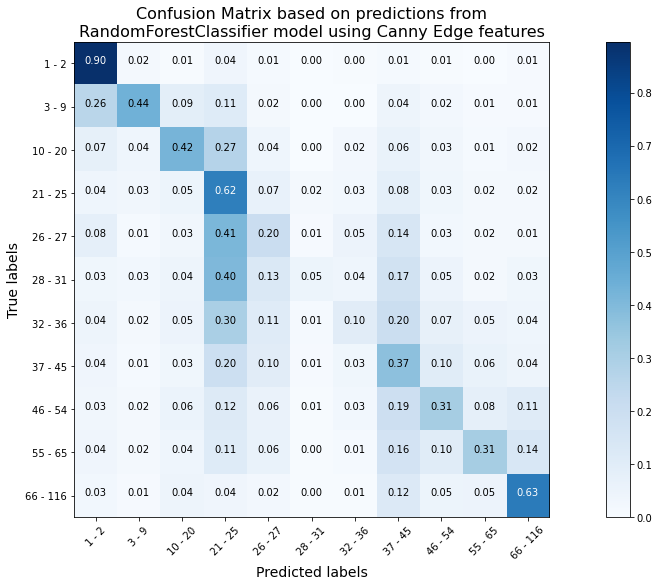

In [ ]:
# Plotting the NORMALIZED confusion matrix using the function defined above.

cm_plot_labels = combined_classes['Age-ranges (classes)']

plt.figure(figsize=(16,8))
plot_confusion_matrix(conf_mat_rfc, cm_plot_labels, normalize=True,
                      title="Confusion Matrix based on predictions from\nRandomForestClassifier model using Canny Edge features",
                      export_as="rfc_canny_conf_mat_norm"
                     )

plt.show()

Confusion matrix, without normalization


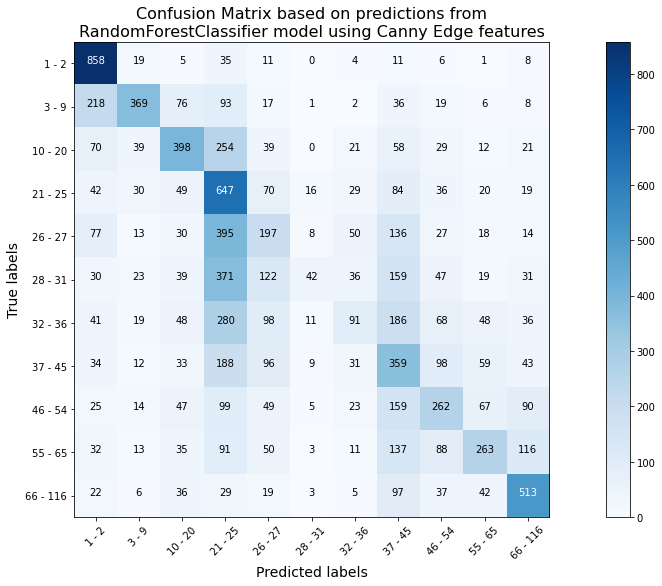

In [ ]:
# Plotting the confusion matrix using the function defined above.

cm_plot_labels = combined_classes['Age-ranges (classes)']

plt.figure(figsize=(16,8))
plot_confusion_matrix(conf_mat_rfc, cm_plot_labels, normalize=False,
                      title="Confusion Matrix based on predictions from\nRandomForestClassifier model using Canny Edge features",
                      export_as="rfc_canny_conf_mat"
                     )

plt.show()

The ***RandomForestClassifier* model** above, with a training accuracy of 66.8% and a testing accuracy of 39.8%, clearly shows that it is **over-fitting and not generalizing well on unseen testing data**.

The **normalized confusion matrix** above also show this clearly — even though the accuracy values are somewhat high for the younger age-ranges (of 1–2, 3–9, 10–20 and 21–25) and for the older age ranges (of 66–116), there is a **presence of significant misclassification for the middle age-ranges of 26–65**.

In [ ]:
# Saving the RandomForestClassifier model from above in a pickle file for possible use later.

rfc_pickle = f"/content/drive/My Drive/Age_classification_with_faces/input_output/rfc_canny_model_acc_{round(rfc_test_acc, 3)}"
pickle.dump(rfc_gs, open(rfc_pickle, 'wb'))

### *GridSearchCV* with *SVC*

In [ ]:
# Creating a SVC object.

svc = SVC(# class_weight='balanced',
          # C=1.0,
          # kernel='rbf',
          # degree=3,
          random_state=42
         )

In [ ]:
# Establishing ranges of hyperparameters of SVC for GridSearchCV.

svc_params = {'C' : [0.001, 1],
              'kernel' : ['rbf', 'poly', 'linear'],
              'degree' : [3, 5]
             }

In [ ]:
# Creating a GridSearchCV object for the SVC object defined above.

svc_gs = GridSearchCV(svc, param_grid=svc_params, n_jobs=-1, cv=5)

In [ ]:
# Fitting X_train_sc and y_train on GridSearchCV object with SVC defined above.

svc_gs.fit(X_train_sc, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 1], 'degree': [3, 5],
                         'kernel': ['rbf', 'poly', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# Best combination of hyperparameters suggested by GridSearchCV.

svc_gs.best_params_

{'C': 1, 'degree': 3, 'kernel': 'poly'}

In [ ]:
# Best accuracy score obtained by the above combination of hyperparameters.

svc_gs.best_score_

0.4899744027303754

In [ ]:
# Scoring the model on training dataset.
# Training Accuracy

svc_train_acc = svc_gs.score(X_train_sc, y_train)
svc_train_acc

0.9286689419795222

In [ ]:
# Estimated Testing Accuracy

# svc_est_test_acc = cross_val_score(svc_gs, X_train_sc, y_train, cv=5).mean()
# svc_est_test_acc

In [ ]:
# Actual Testing Accuracy

svc_test_acc = svc_gs.score(X_test_sc, y_test)
svc_test_acc

0.5337447740394187

In [ ]:
# Summary scores from GridSearchCV with SVC.

print("SVC summary of accuracy scores:")
print(f"GridSearchCV best accuracy = {round(svc_gs.best_score_, 3)}")
print("\nUsing GridSearchCV best params suggested,")
print(f"Training accuracy = {round(svc_train_acc, 3)}")
# print(f"Est. Test accuracy (cv=5) = {round(svc_est_test_acc , 3)}")
print(f"Testing accuracy = {round(svc_test_acc, 3)}")

SVC summary of accuracy scores:
GridSearchCV best accuracy = 0.49

Using GridSearchCV best params suggested,
Training accuracy = 0.929
Testing accuracy = 0.534


In [ ]:
# Generating predictions on testing dataset using the model above.

svc_pred = svc_gs.predict(X_test_sc)

In [ ]:
len(svc_pred)

10046

In [ ]:
len(y_test)

10046

In [ ]:
# Generating a confusion matrix based on above predictions.

conf_mat_svc = confusion_matrix(y_test, svc_pred)
conf_mat_svc

array([[881,  19,   1,  10,  12,   3,  19,  12,   0,   0,   1],
       [ 61, 588,  34,  70,  20,   9,  36,  24,   2,   1,   0],
       [  8,  36, 533, 219,  43,  18,  36,  32,   7,   4,   5],
       [  2,   4,  34, 709, 110,  59,  64,  51,   3,   2,   4],
       [  4,   9,  12, 293, 400,  61,  98,  63,   6,  10,   9],
       [  0,   6,  13, 267, 140, 258, 114,  91,  16,   6,   8],
       [  1,   5,   9, 177, 133,  64, 334, 159,  30,   8,   6],
       [  2,   3,  10,  98, 105,  48, 146, 485,  38,  15,  12],
       [  2,   9,  13,  51,  54,  21,  92, 213, 320,  47,  18],
       [  2,   5,  13,  57,  43,  17,  96, 172,  57, 332,  45],
       [  0,   6,  15,  18,  22,  11,  42,  97,  32,  44, 522]])

Normalized confusion matrix


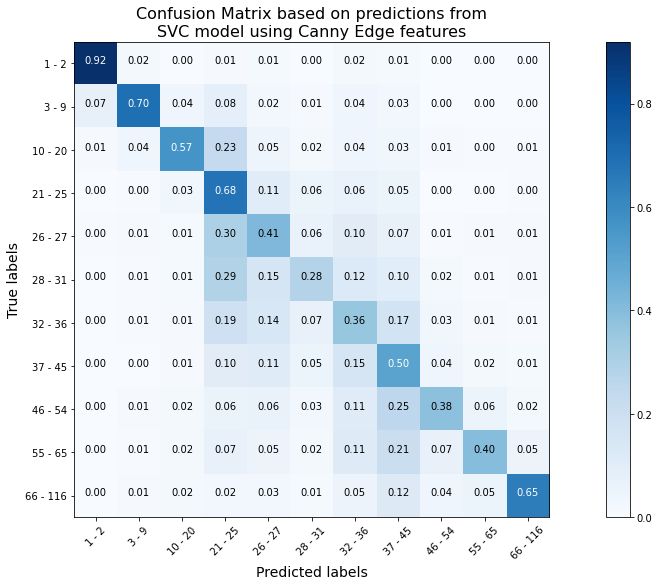

In [ ]:
# Plotting the NORMALIZED confusion matrix using the function defined above.

cm_plot_labels = combined_classes['Age-ranges (classes)']

plt.figure(figsize=(16,8))
plot_confusion_matrix(conf_mat_svc, cm_plot_labels, normalize=True,
                      title="Confusion Matrix based on predictions from\nSVC model using Canny Edge features",
                      export_as="svc_canny_conf_mat_norm"
                     )

plt.show()

Confusion matrix, without normalization


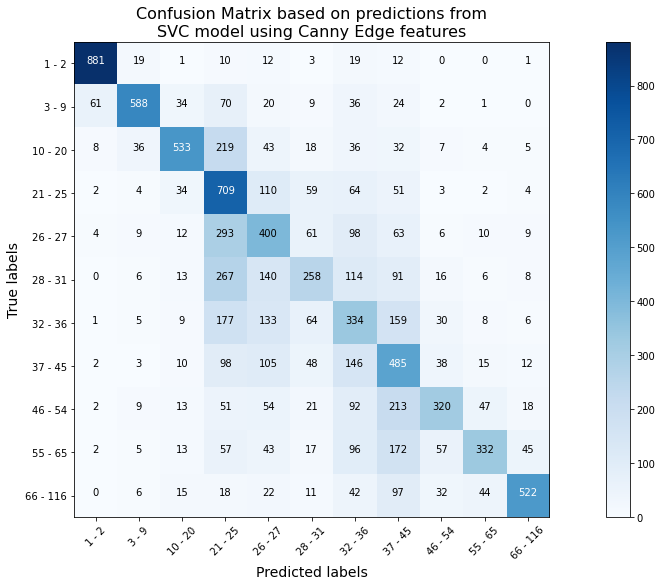

In [ ]:
# Plotting the confusion matrix using the function defined above.

cm_plot_labels = combined_classes['Age-ranges (classes)']

plt.figure(figsize=(16,8))
plot_confusion_matrix(conf_mat_svc, cm_plot_labels, normalize=False,
                      title="Confusion Matrix based on predictions from\nSVC model using Canny Edge features",
                      export_as="svc_canny_conf_mat"
                     )

plt.show()

As with the *RandomForestClassifier* model above, the ***SVC* model**, with a training accuracy of 92.9% and a testing accuracy of 53.4%, also shows that it is **over-fitting and not generalizing well on unseen testing data**. Even though the training and testing accuracies are better with *SVC* than with *RandomForestClassifier*, the **degree of over-fit is significantly worse than *RandomForestClassifier***.

The **normalized confusion matrix** above also show the same trend — even though the accuracy values are somewhat high for the younger age-ranges (of 1–2, 3–9, 10–20 and 21–25) and for the older age ranges (of 66–116), there is a **presence of significant misclassification for the middle age-ranges of 26–65**.

In [ ]:
# Saving the SVC model from above in a pickle file for possible use later.

svc_pickle = f"/content/drive/My Drive/Age_classification_with_faces/input_output/svc_canny_model_acc_{round(svc_test_acc, 3)}"
pickle.dump(svc_gs, open(svc_pickle, 'wb'))

## Traditional ML: Summary and Limitations

![summary_table_traditional_ml.png](https://drive.google.com/uc?export=view&id=1kc7idDm-1QmSTfdmk592NpMXWPU8moGu)

As is clear from the above summary of scores, **modelling using the traditional machine learning methodology may not be the best way to approach this problem**. I will now try modelling with deep learning and see if it provides a better result.

There are, of course, a multitude of methods that could still be utilized to improve the above accuracy scores and reduce the degree of over-fit in the models. For instance, better differentiating features could be extracted from the images using some other more complicated techniques, or other classifiers could be utilized to see whether they perform better in this case.